In [ ]:
# outlier detection and handling
import numpy as np
import pandas as pd
import seaborn as sns


# read data
data = pd.read_csv('C:/Users/Dr. Manoj Kr. Mishra/Desktop/wiley/Data/Solid_Waste_Generation___Recycling.csv')
df1=data  # let us keep original data into df1 for letter use


In [ ]:
data.shape

In [3]:
df1.head(5)

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.0,2515427.0,6577102.3,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.0,2838771.0,6257801.0,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.0,2724337.0,6084275.0,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.0,2666863.0,6122052.0,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.0,4153915.0,6526087.0,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241


In [4]:
df1.columns

Index(['Year', 'Agricultural Organics', 'Aluminum Cans', 'Anti-freeze',
       'Appliances/White Goods', 'Ash, Sand & Dust used in Asphalt Production',
       'Asphalt/Concrete', 'Batteries - Auto Lead Acid', 'Cardboard',
       'Carpet & Pad', 'Cartons', 'Construction & Demolition Debris',
       'Container Glass', 'Container Glass (used as aggregate)', 'Electronics',
       'Fats and Oils', 'Ferrous Metals', 'Fluorescent light bulbs',
       'Food (recovered)', 'Food Processing Waste (pre-consumer)',
       'Food Scraps (post-consumer)', 'Gypsum', 'HDPE Plastics',
       'High Grade Paper', 'Household Batteries', 'Industrial Batteries',
       'Industrial Organics', 'Industrial Paper', 'Landclearing Debris',
       'Landclearing Debris for ER', 'LDPE Plastics', 'Mattresses',
       'Miscellaneous', 'Mixed Paper', 'Mixed Plastics', 'Newspaper',
       'Nonferrous Metals', 'Oil Filters', 'Other Fuels (Reuse & ER)',
       'Other Organics', 'Other Recyclable Plastics', 'Paint',
       '

In [5]:
df1.transpose

<bound method DataFrame.transpose of     Year  Agricultural Organics  Aluminum Cans  Anti-freeze  \
0   2000                      0          17944         2475   
1   2001                      0          12540         4157   
2   2002                      0          12718         4506   
3   2003                      0          17608         4722   
4   2004                      0          16010         8050   
5   2005                      0          15441         8767   
6   2006                      0          14951         7507   
7   2007                      0          14005         7055   
8   2008                  31800          12842         6586   
9   2009                  45431          21098         5194   
10  2010                  55689          13655         4783   
11  2011                  76645          13115         4872   
12  2012                 102732          13635         6797   
13  2013                  97270          16679         4804   
14  2014          

In [6]:
# outliers can be detected in 3 ways(many other also possible)
# 1. sorting, 2 visual representation and 3. IQR
# by sorting
df= data.sort_values('Aluminum Cans')

In [7]:
# observe first and last few rows

df['Aluminum Cans'].head()


1     12540
2     12718
8     12842
11    13115
12    13635
Name: Aluminum Cans, dtype: int64

In [8]:
df['Aluminum Cans'].tail()

4     16010
13    16679
3     17608
0     17944
9     21098
Name: Aluminum Cans, dtype: int64

<AxesSubplot:xlabel='Aluminum Cans'>

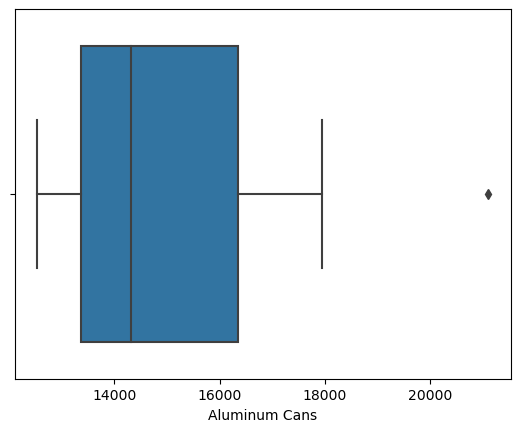

In [9]:
# check outlier by graph
sns.boxplot(data=data,x='Aluminum Cans')

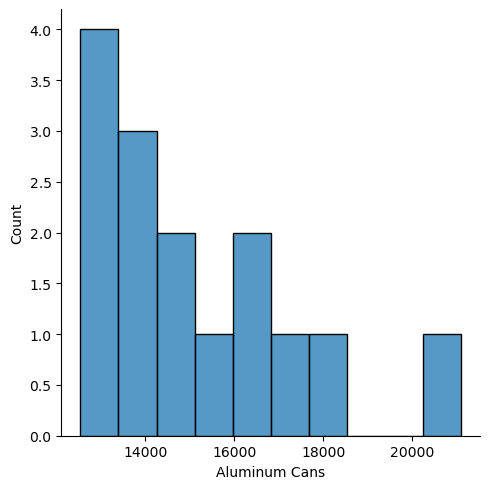

In [10]:
# show distribution plot, shows dars by default, an isolated bar at around the value 21000. this is outlier.
sns.displot(data=data,x='Aluminum Cans', bins=10)

In [11]:
# cal IQR, python having method quantile
q3 = data['Aluminum Cans'].quantile(0.75)
q3

16344.5

In [12]:
q1 = data['Aluminum Cans'].quantile(0.25)
q1

13375.0

In [13]:
# iqr
iqr= q3-q1
iqr

2969.5

In [14]:
# cal upper n lower limits from iqr
u1= q3+(1.5*iqr)
l1= q1-(1.5*iqr)
print(u1,l1)

20798.75 8920.75


In [15]:
# upper bound 
upper =np.where(data['Aluminum Cans']>=u1)
# lower bound
lower= np.where(data['Aluminum Cans']<=l1)



# delet the row above and below


#data.drop(upper[0], inplace=True)
##data.drop(lower[0], inplace=True)

In [16]:
# check how many row removed, ---1
data.shape

(15, 80)

In [17]:
# let us replace the outliers with a value
# first convert the aluminum cans values into an array
arr= df1['Aluminum Cans'].values

In [18]:
# if arr values are in between l1 and u1, represnt that value as Tue else False
# false are outliers
true_index= (l1<arr)&(arr<u1)
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [19]:
# so calculate median of all values other than the outliers
mid= np.median(df1['Aluminum Cans'][true_index])
mid

14157.0

In [20]:
# repalce all the outliers with median value, i.e false_index values to be repalced
false_index=~ true_index
df1['Aluminum Cans'].values[false_index]=mid
df1

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.00,2515427.00,6.577102e+06,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.00,2838771.00,6.257801e+06,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.00,2724337.00,6.084275e+06,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.00,2666863.00,6.122052e+06,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.00,4153915.00,6.526087e+06,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241
5,2005,0,15441,8767,47302,14588,1783418,28903,565698,186,...,2736151.00,5355491.00,7.696424e+06,10432575,14758169,17494320,47.85,6256400,15.321797,6.184786
6,2006,0,14951,7507,49796,4008,2295278,25414,570802,897,...,1689840.00,4164837.00,7.760714e+06,9450554,15442903,17132743,49.75,6375600,14.724582,6.602388
7,2007,0,14005,7055,44667,2521,2089972,25734,555757,1193,...,1810580.00,4557764.00,8.082291e+06,9892871,15372234,17182814,47.42,6488000,14.511776,6.156734
8,2008,31800,12842,6586,43401,0,1510051,25219,569688,3297,...,1634267.82,4154879.40,7.516909e+06,9151177,14309506,15943774,47.47,6587600,13.261756,5.649965
9,2009,45431,14157,5194,39777,344,2186429,21493,491266,3317,...,1550645.32,3039032.92,6.126660e+06,7677305,13564327,15114972,54.83,6668200,12.420408,6.111746
